In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

In [5]:
folder = './'
files = ['random_nairobi.csv', 'random_quito.csv', 'random_brisbane.csv', 'random_mumbai.csv', 'random_guadalupe.csv']
files += ['random_complete_'+str(i)+'.csv' for i in [5,7,16, 27,65,127]]
print(files)


['random_nairobi.csv', 'random_quito.csv', 'random_brisbane.csv', 'random_mumbai.csv', 'random_guadalupe.csv', 'random_complete_5.csv', 'random_complete_7.csv', 'random_complete_16.csv', 'random_complete_27.csv', 'random_complete_65.csv', 'random_complete_127.csv']


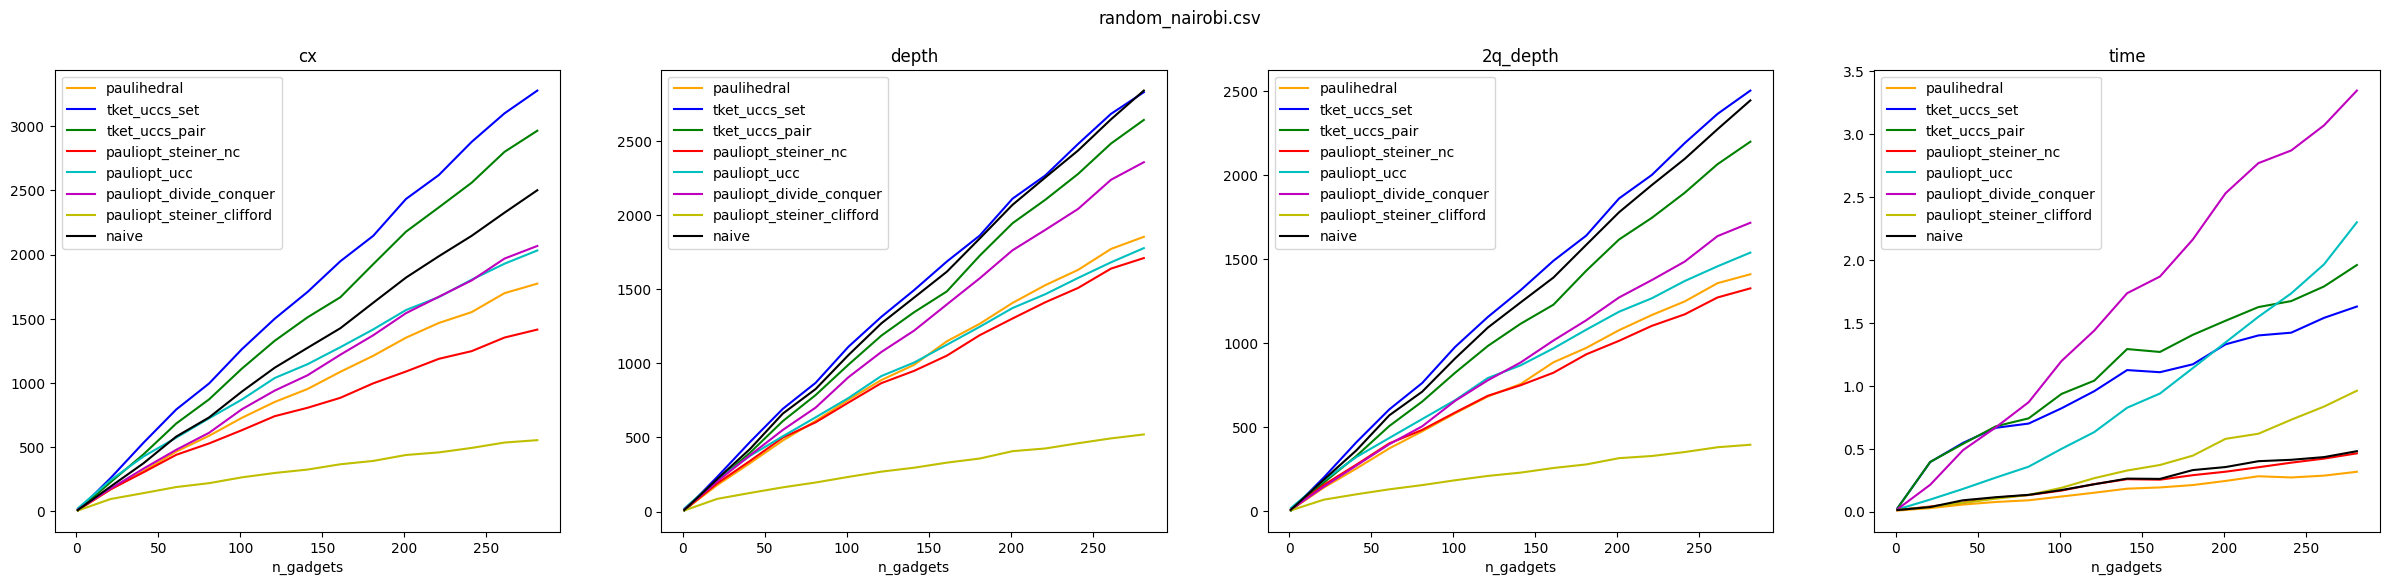

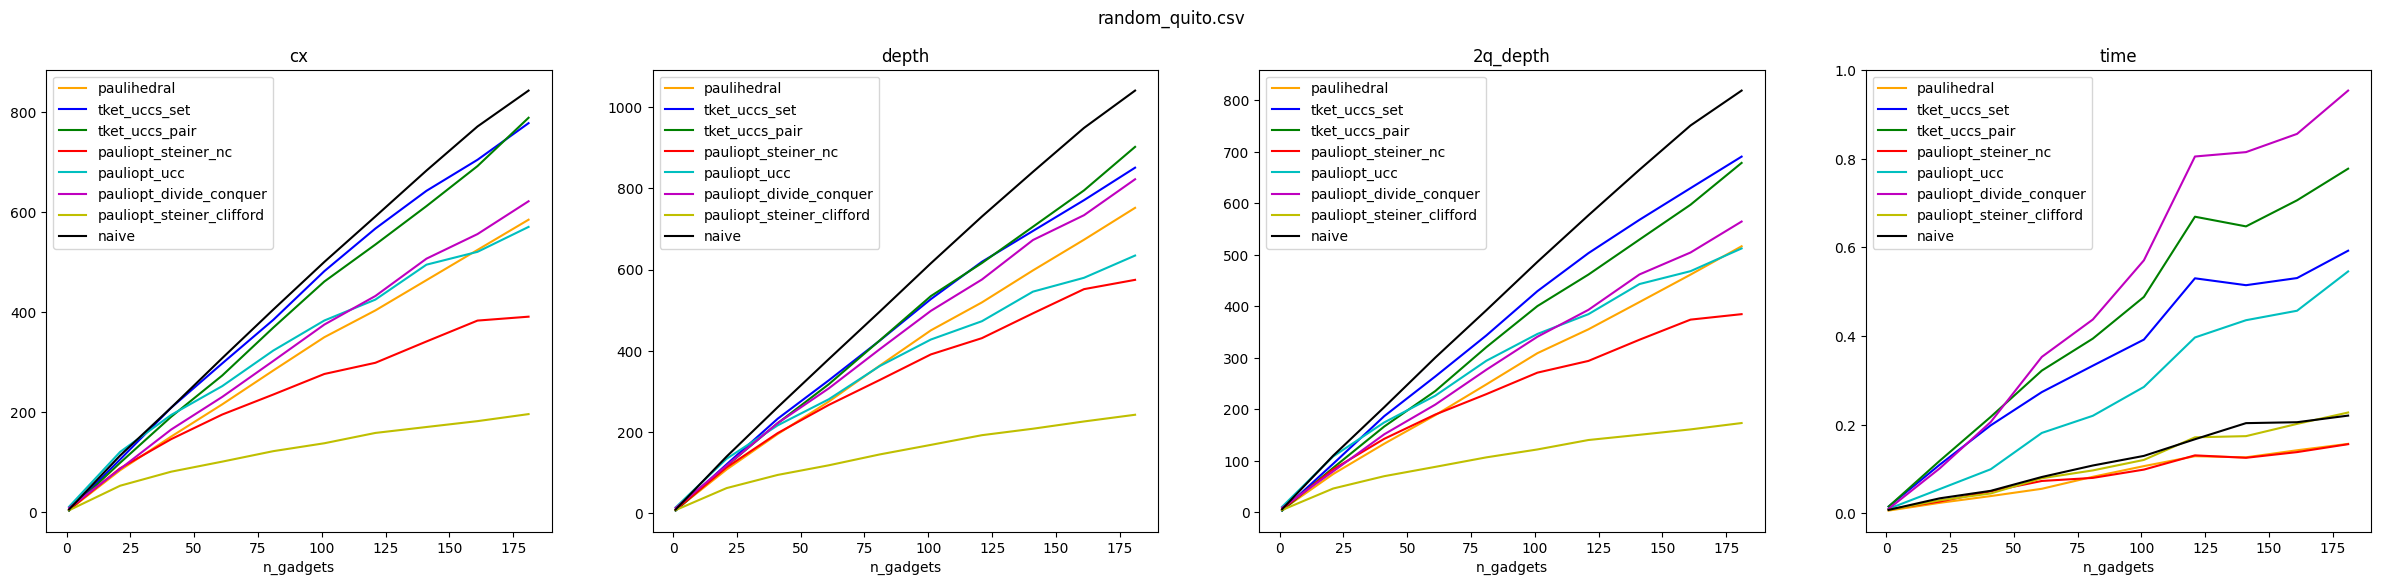

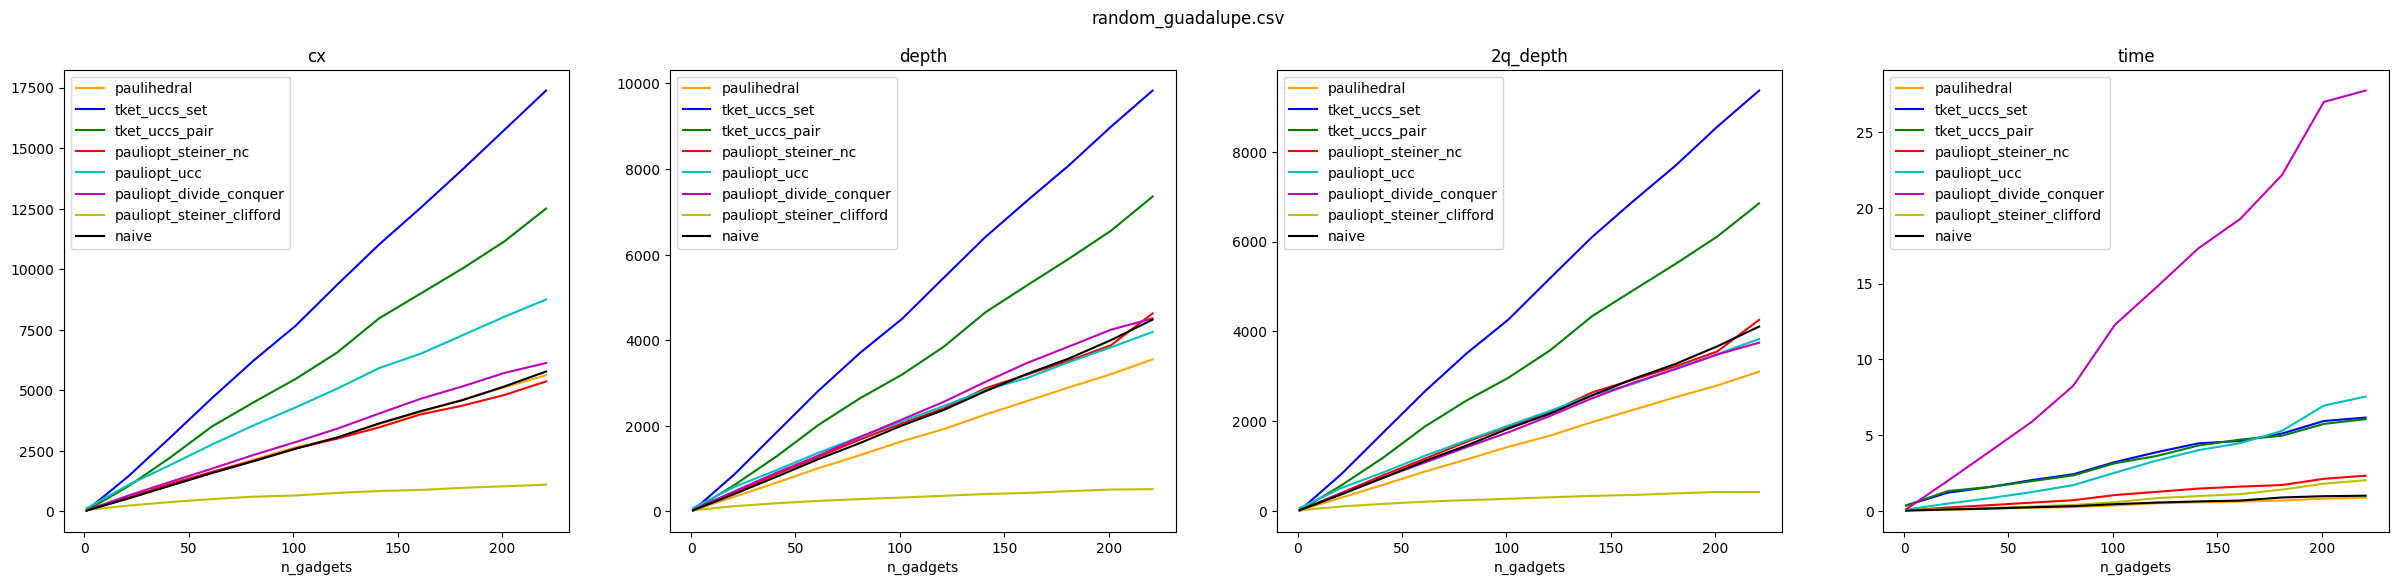

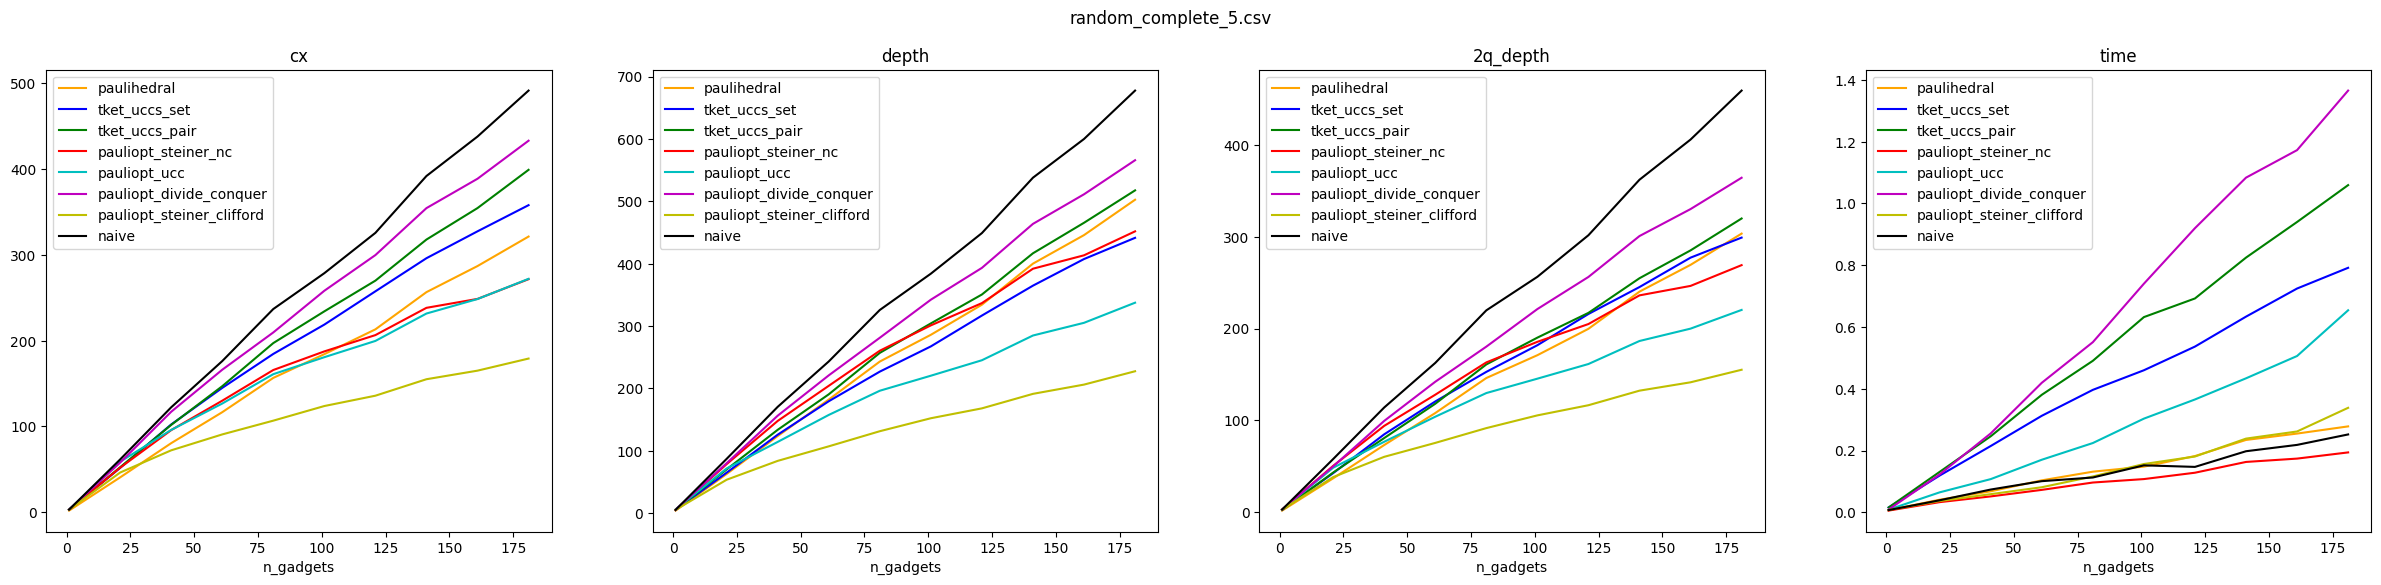

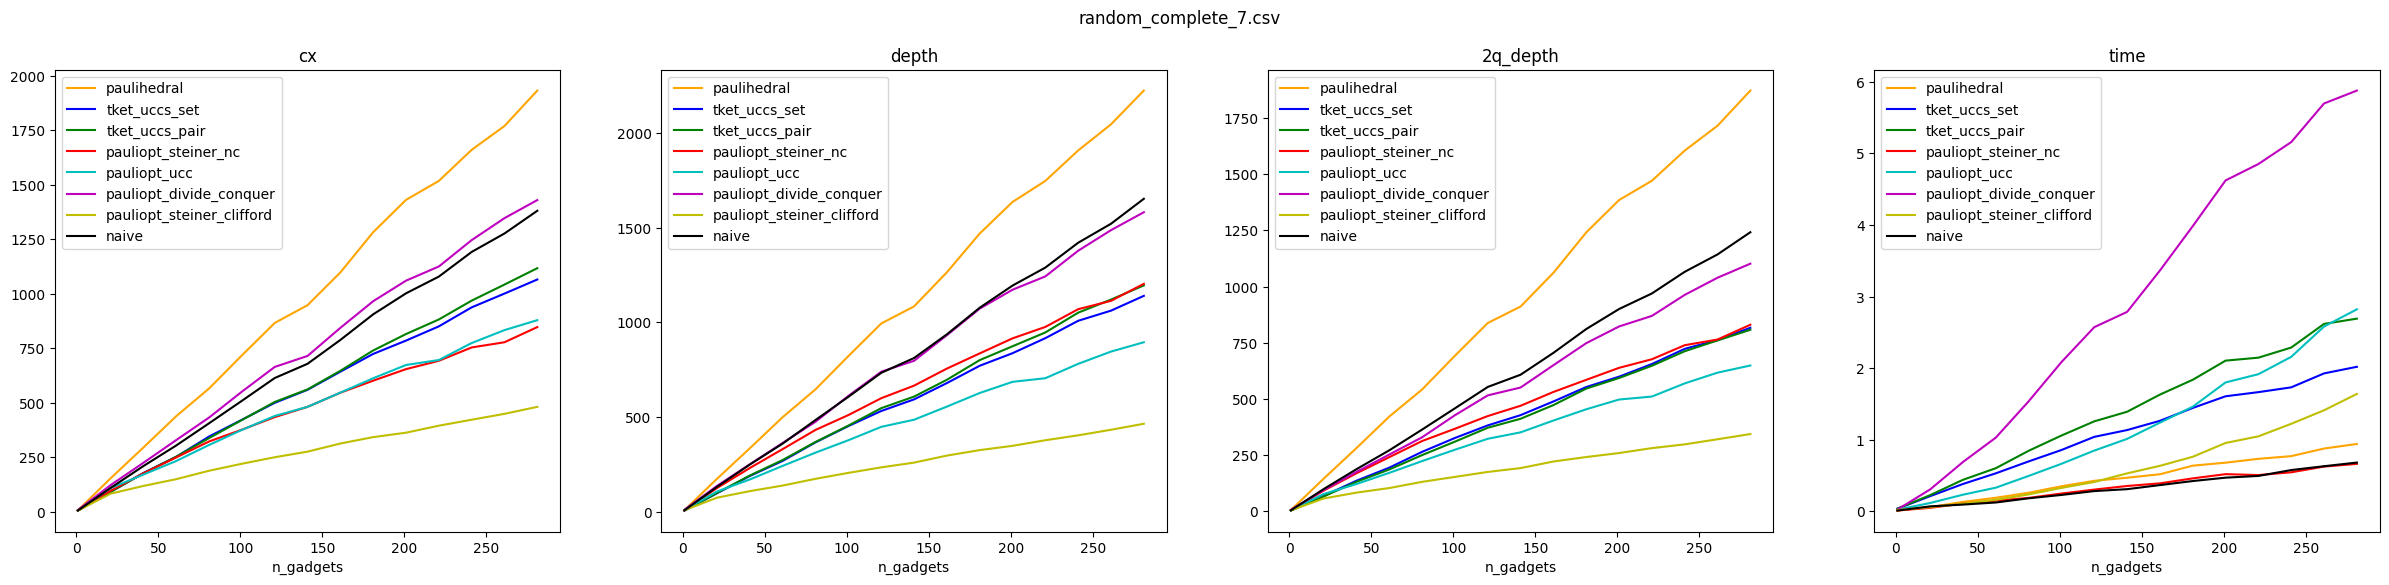

In [6]:
def show_results(folder, filename):
    file = os.path.join(folder, filename)
    if not os.path.exists(file):
        return
    df = pd.read_csv(file)
    if not df.size:
        return
    methods = [m for m in  df["method"].unique() if not pd.isnull(m)]
    metrics = ["cx", "depth", "2q_depth", "time"]
    n_gadgets = [g for g in df['n_gadgets'].unique() if not pd.isnull(g)]
    df_grp = df.groupby(['num_qubits', 'n_gadgets', 'method'], as_index=False).mean().dropna()
    
    fig, axs = plt.subplots(1,4)
    fig.set_figwidth(30)
    fig.set_figheight(6) 
    fig.suptitle(filename)
    for method in styles.keys():
        df_grp[df_grp["method"]==method].plot(subplots=True, y=metrics, x='n_gadgets', label=[method]*4, style=styles[method], ax=axs)
    for i, metric in enumerate(metrics):
        axs[i].set_title(metric)

styles = {
    'paulihedral': 'orange',
    'tket_uccs_set': 'b', 
    'tket_uccs_pair': 'g', 
    'pauliopt_steiner_nc': 'r', 
    'pauliopt_ucc': 'c', 
    'pauliopt_divide_conquer': 'm', 
    'pauliopt_steiner_clifford': 'y', 
    'naive': 'k'
}
for file in files:
    show_results(folder, file)